<a href="https://colab.research.google.com/github/Vanshika1703/apple-stock-data-analysis/blob/main/stock_market_datanalysis49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests pandas matplotlib seaborn --quiet

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("muted")

In [ ]:
API_KEY = "v6jsxPZWCwQMpIOUsrGTLpwpDOD_lelq"
ticker = "AAPL"

In [ ]:
url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/2024-01-01/2025-01-01?adjusted=true&sort=asc&apiKey={API_KEY}"
response = requests.get(url).json()

In [ ]:
data = response['results']
df = pd.DataFrame(data)

In [ ]:
df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to date
df.rename(columns={'t':'Date','o':'Open','h':'High','l':'Low','c':'Close','v':'Volume'}, inplace=True)
df = df[['Date','Open','High','Low','Close','Volume']]  # Arrange columns
df.set_index('Date', inplace=True)

print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
                        Open      High      Low   Close      Volume
Date                                                               
2024-01-02 05:00:00  187.150  188.4400  183.885  185.64  81964874.0
2024-01-03 05:00:00  184.220  185.8800  183.430  184.25  58414460.0
2024-01-04 05:00:00  182.150  183.0872  180.880  181.91  71878670.0
2024-01-05 05:00:00  181.990  182.7600  180.170  181.18  62371161.0
2024-01-08 05:00:00  182.085  185.6000  181.500  185.56  59144470.0


In [ ]:
print("\nBasic Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 05:00:00 to 2024-12-31 05:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB
None

Summary Statistics:
             Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   206.951837  208.909997  205.216341  207.205913  5.707368e+07
std     25.332977   25.581004   25.132710   25.502993  3.077656e+07
min    165.350000  166.400000  164.075000  165.000000  2.323470e+07
25%    183.827500  185.135000  182.205000  184.225000  4.157360e+07
50%    214.310000  216.840000  211.945000  214.265000  4.976259e+07
75%    227.450000  229.402500  225.2

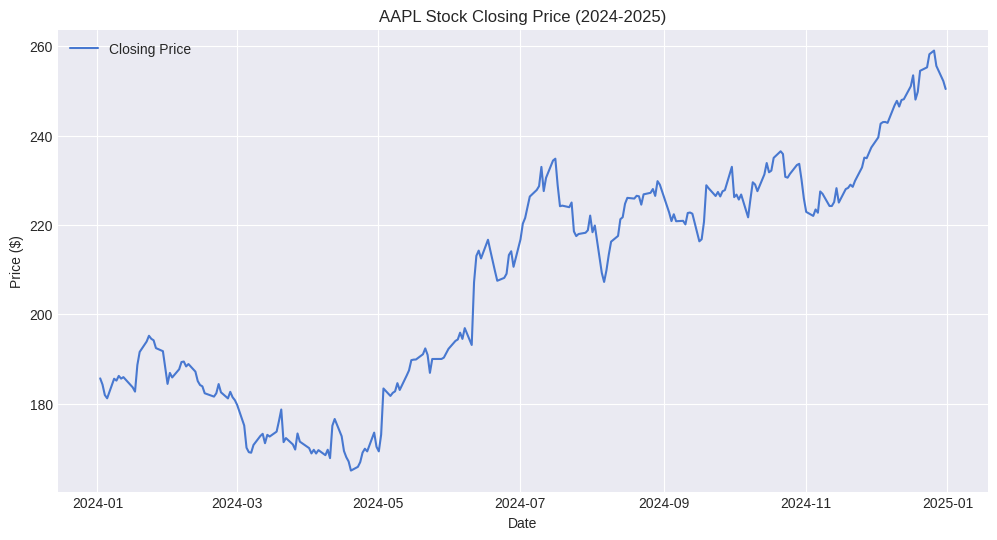

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title(f"{ticker} Stock Closing Price (2024-2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
volatility = df['Daily_Return'].std() * 100  # Percentage
print(f"\nVolatility (Std Dev of Returns): {volatility:.2f}%")



Volatility (Std Dev of Returns): 1.41%


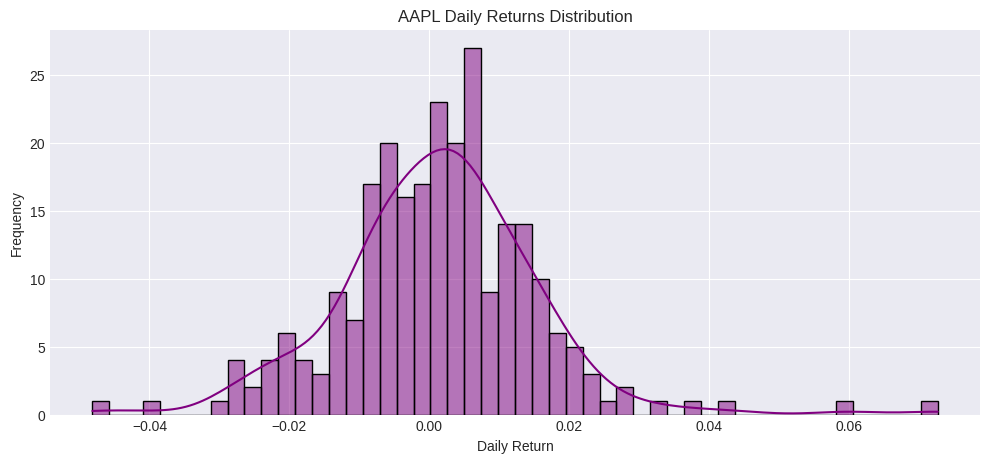

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='purple')
plt.title(f"{ticker} Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

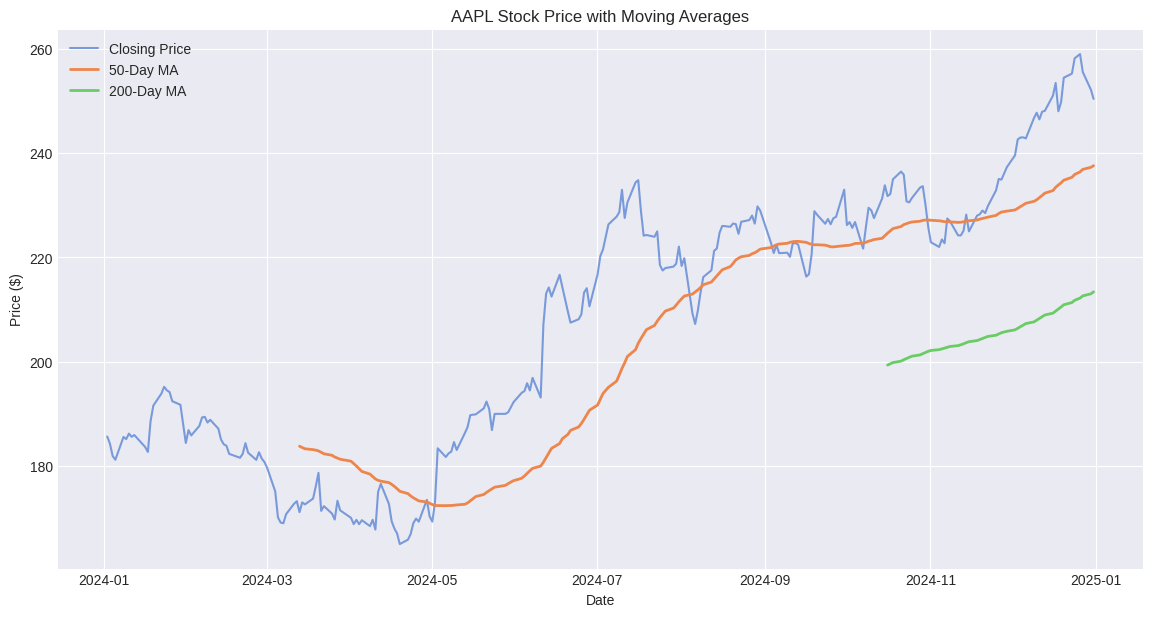

In [ ]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price', alpha=0.7)
plt.plot(df['MA50'], label='50-Day MA', linewidth=2)
plt.plot(df['MA200'], label='200-Day MA', linewidth=2)
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


In [ ]:
max_price = df['Close'].max()
min_price = df['Close'].min()
best_day = df['Close'].idxmax().strftime('%Y-%m-%d')
worst_day = df['Close'].idxmin().strftime('%Y-%m-%d')

print(f"\nKey Insights for {ticker}:")
print(f"1. Highest Price: ${max_price:.2f} on {best_day}")
print(f"2. Lowest Price: ${min_price:.2f} on {worst_day}")
print(f"3. Annual Volatility: {volatility:.2f}%")
print(f"4. 50-Day & 200-Day moving averages help identify long-term trends.")


Key Insights for AAPL:
1. Highest Price: $259.02 on 2024-12-26
2. Lowest Price: $165.00 on 2024-04-19
3. Annual Volatility: 1.41%
4. 50-Day & 200-Day moving averages help identify long-term trends.


In [ ]:
#multi stock comparison
tickers = ["AAPL", "TSLA", "MSFT"]  # Example: Apple, Tesla, Microsoft



Multi-Stock Dataset:
                       AAPL    TSLA    MSFT
Date                                       
2024-01-02 05:00:00  185.64  248.42  370.87
2024-01-03 05:00:00  184.25  238.45  370.60
2024-01-04 05:00:00  181.91  237.93  367.94
2024-01-05 05:00:00  181.18  237.49  367.75
2024-01-08 05:00:00  185.56  240.45  374.69


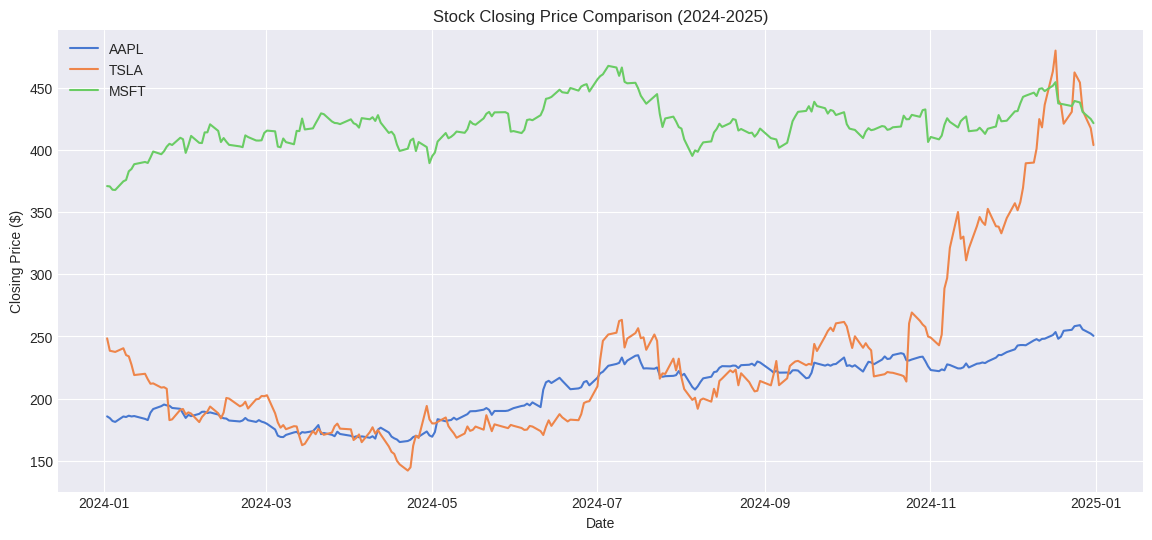

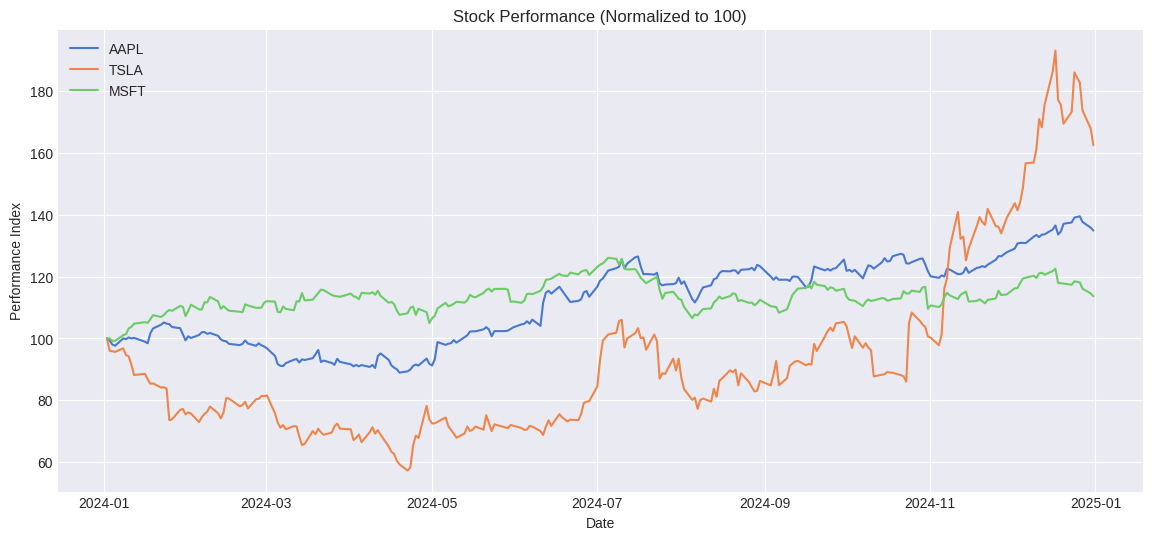

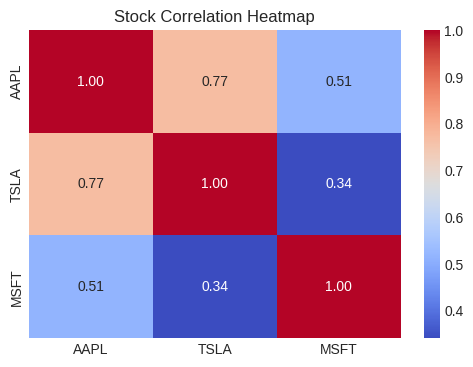


Key Insights:
1. The first chart shows absolute closing prices for each stock.
2. The second chart shows relative performance (good for portfolio comparison).
3. The heatmap reveals which stocks move together (high correlation).


In [ ]:
def get_stock_data(ticker, start="2024-01-01", end="2025-01-01"):
    """Fetches historical stock data for a ticker from Polygon.io"""
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start}/{end}?adjusted=true&sort=asc&apiKey={API_KEY}"
    response = requests.get(url).json()

    if "results" not in response:
        print(f"❌ No data for {ticker}")
        return None

    df = pd.DataFrame(response['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.rename(columns={'t':'Date','o':'Open','h':'High','l':'Low','c':'Close','v':'Volume'}, inplace=True)
    df = df[['Date','Close']]
    df.set_index('Date', inplace=True)
    df.rename(columns={'Close':ticker}, inplace=True)
    return df

# Fetch data for all tickers and merge
stock_data = pd.concat([get_stock_data(t) for t in tickers], axis=1)
print("Multi-Stock Dataset:")
print(stock_data.head())

# --------------------------------------
# 3. Comparative Closing Price Plot
# --------------------------------------
plt.figure(figsize=(14,6))
for t in tickers:
    plt.plot(stock_data.index, stock_data[t], label=t)
plt.title("Stock Closing Price Comparison (2024-2025)")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.show()

# --------------------------------------
# 4. Normalized Comparison (Portfolio Style)
# --------------------------------------
normalized_data = stock_data / stock_data.iloc[0] * 100

plt.figure(figsize=(14,6))
for t in tickers:
    plt.plot(normalized_data.index, normalized_data[t], label=t)
plt.title("Stock Performance (Normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

# --------------------------------------
# 5. Correlation Heatmap (Which stocks move together?)
# --------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(stock_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Correlation Heatmap")
plt.show()

# --------------------------------------
# 6. Key Insights
# --------------------------------------
print("\nKey Insights:")
print("1. The first chart shows absolute closing prices for each stock.")
print("2. The second chart shows relative performance (good for portfolio comparison).")
print("3. The heatmap reveals which stocks move together (high correlation).")

In [ ]:
import requests
import pandas as pd

API_KEY="BEOArM34Zu0tRhoRlPAhcjnBBzLL4zRV"
ticker = "AAPL"
start_date = "2024-01-01"
end_date = "2025-01-01"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={API_KEY}"
response = requests.get(url).json()

# Convert to DataFrame
df = pd.DataFrame(response['results'])
df['t'] = pd.to_datetime(df['t'], unit='ms')
df.rename(columns={'t':'Date','o':'Open','h':'High','l':'Low','c':'Close','v':'Volume'}, inplace=True)
df = df[['Date','Open','High','Low','Close','Volume']]

# Save for Power BI
df.to_csv("AAPL_stock_data.csv", index=False)
print("CSV Saved Successfully!")


CSV Saved Successfully!
